## Calculating $\pi$ using Monte Carlo Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

(-1.1, 1.1)

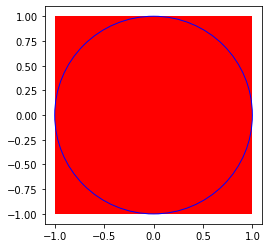

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect = 'equal')

rectangle = patches.Rectangle((-1,-1),2,2, facecolor = 'red')
ax.add_patch(rectangle)

circle = patches.Circle((0,0),1, facecolor = 'none', edgecolor = 'blue')
ax.add_patch(circle)

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

In [3]:
points = 1000
rand = 2 * np.random.rand(2*points) - 1

In [4]:
randpoints = rand.reshape(points,2)

In [5]:
normpoints = randpoints[:,0]**2 + randpoints[:,1]**2

In [6]:
pointsIn = randpoints[normpoints <= 1]

In [7]:
pointsOut = randpoints[normpoints > 1]

In [8]:
piapprox = 4 * len(pointsIn)/points
print(piapprox)

3.152


In [9]:
np.pi - piapprox

-0.010407346410207019

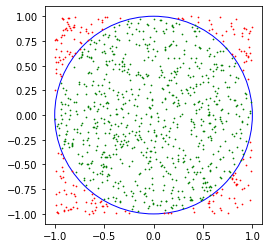

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect = 'equal')

# rectangle = patches.Rectangle((-1,-1),2,2, facecolor = 'red')
# ax.add_patch(rectangle)

circle = patches.Circle((0,0),1, facecolor = 'none', edgecolor = 'blue')
ax.add_patch(circle)

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

plt.scatter(pointsIn[:,0], pointsIn[:,1], color = 'green', s = 0.5)
plt.scatter(pointsOut[:,0], pointsOut[:,1], color = 'red', s = 0.5)

In [11]:
# Alternative Method (Loop)

i = 0
counter = 0

while (i<points):
    if (np.linalg.norm(2*np.random.rand(2)-1) < 1):
        counter = counter + 1
    i = i + 1

In [12]:
piapprox = 4 * counter/points

In [13]:
print(piapprox)

3.152


In [14]:
piapprox - np.pi

0.010407346410207019

## Simulating a magnet using Monte Carlo Algorithm

### Generate Starting Configuration

In [15]:
length = 50
num = length**2

randphi = 2*np.pi*np.random.rand(num).reshape(length,length,1)
randtheta = np.pi*np.random.rand(num).reshape(length,length,1)

###  Magnetic Moments

In [16]:
mag = np.array([np.cos(randphi)*np.sin(randtheta),np.sin(randphi)*np.sin(randtheta),np.cos(randtheta) ])

In [17]:
mag.shape

(3, 50, 50, 1)

In [18]:
mag[:,0,0,0] # magnetic moment at x=0, y=0, z=0

array([0.06590678, 0.02664063, 0.99747009])

In [19]:
mag[2,0,0,0] # z-component

0.9974700862230245

### Positions

In [20]:
coords = np.array(np.meshgrid(np.arange(length), np.arange(length), np.arange(1)))

### Plot

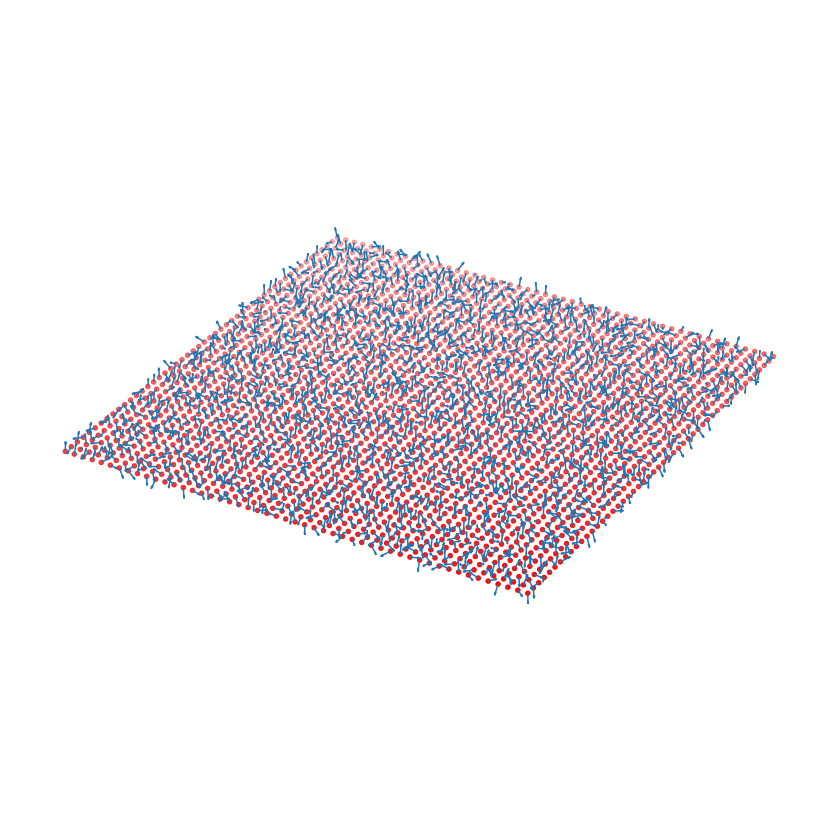

In [21]:
plt.rcParams['figure.figsize'] = [40,15]

arrowplot = plt.axes(projection = '3d')
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length,length,2))

arrowplot.axis(False) # make background invisible

arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0], mag[1], mag[2]
)

arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')

### Defining the Energy

In [22]:
J = 1

In [23]:
def EnergyExchangeContribution(mag,x,y):
    return -0.5*J*np.dot(mag[:,x,y,0], mag[:,(x+1)%length,y,0]+mag[:,(x-1)%length,y,0]+mag[:,x,(y-1)%length,0]+mag[:,x,(y+1)%length,0])

def EnergyExchange(mag):
    energy = 0
    for x in range(length):
        for y in range(length):
            energy = energy + EnergyExchangeContribution(mag,x,y)
            
    return energy

In [24]:
EnergyExchange(mag)

6.995458228522994

### Simulating a Metropolis Step

In [25]:
def stepExchange(mag):
    x = np.random.randint(length)
    y = np.random.randint(length)
    EnergyOld = 2 * EnergyExchangeContribution(mag,x,y)
    
    randphi = 2 * np.pi * np.random.rand()
    randtheta = np.pi * np.random.rand()
    
    savemag = np.array(mag[:,x,y,0])
    mag[:,x,y,0] = np.array([np.cos(randphi)*np.sin(randtheta),np.sin(randphi)*np.sin(randtheta),np.cos(randtheta) ])
    
    EnergyNew = 2 * EnergyExchangeContribution(mag,x,y)
    
    if (EnergyNew < EnergyOld):
        exchangeenergy = EnergyNew - EnergyOld
    else:
        mag[:,x,y,0] = savemag
        exchangeenergy = 0
    return [mag, exchangeenergy]

In [26]:
stepExchange(mag)[1]

0

### Run the Monte Carlo Algorithm

In [27]:
numberSteps = 1000000

energy = EnergyExchange(mag)
energylist = [energy]

for i in range(numberSteps):
    mag, exchangeenergy = stepExchange(mag)
    
    energy = energy + exchangeenergy
    energylist.append(energy)

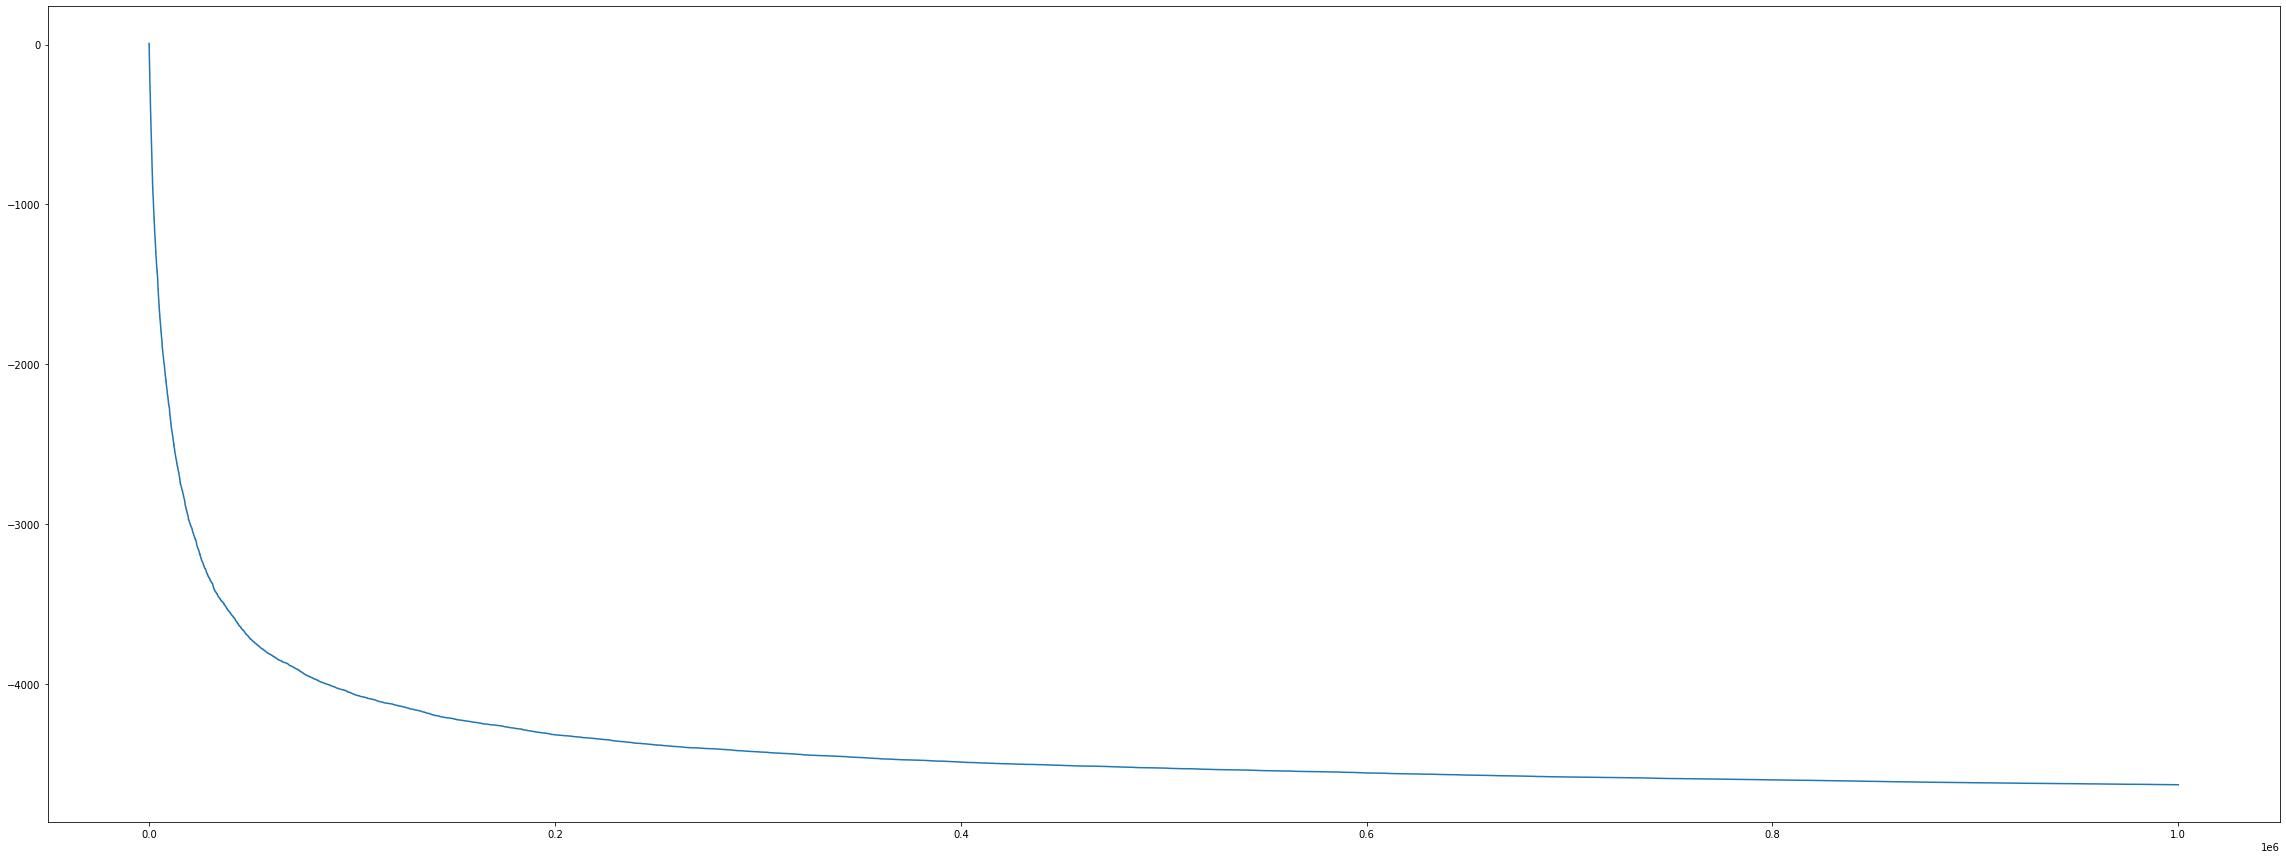

In [28]:
plt.plot(range(numberSteps+1), energylist)

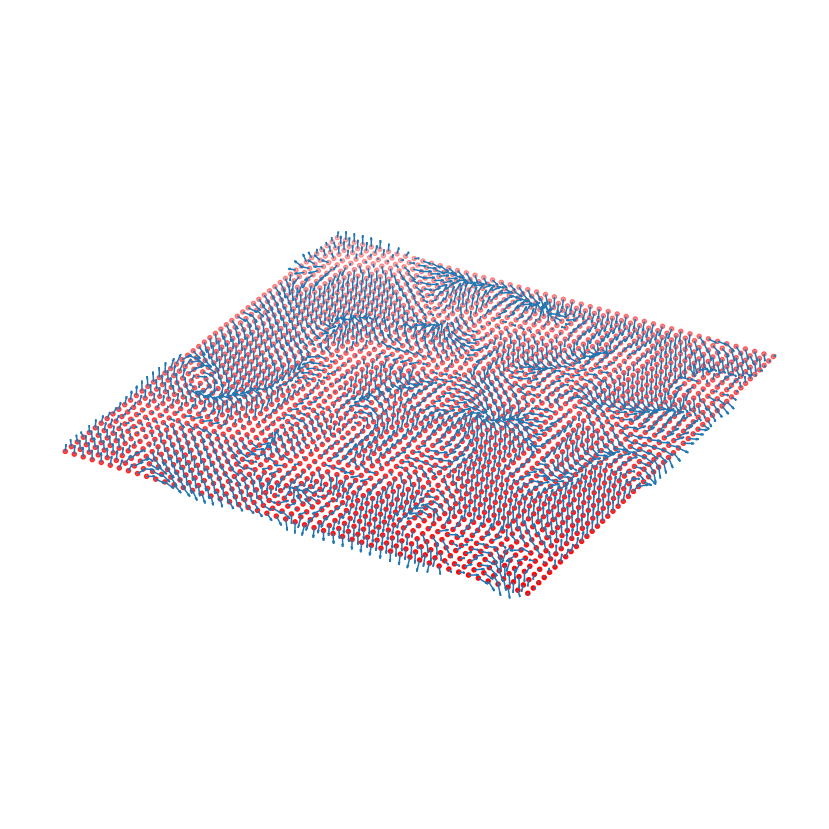

In [29]:
arrowplot = plt.axes(projection = '3d')
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length,length,2))

arrowplot.axis(False) # make background invisible

arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0], mag[1], mag[2]
)

arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')

In [30]:
energylist[-1]

-4631.61779963759

### Improve Code using finite temperatures

In [35]:
def stepExchangeT(mag, kBtemp):
    x = np.random.randint(length)
    y = np.random.randint(length)
    EnergyOld = 2 * EnergyExchangeContribution(mag,x,y)
    
    randphi = 2 * np.pi * np.random.rand()
    randtheta = np.pi * np.random.rand()
    
    savemag = np.array(mag[:,x,y,0])
    mag[:,x,y,0] = np.array([np.cos(randphi)*np.sin(randtheta),np.sin(randphi)*np.sin(randtheta),np.cos(randtheta) ])
    
    EnergyNew = 2 * EnergyExchangeContribution(mag,x,y)
    
    if (EnergyNew < EnergyOld):
        exchangeenergy = EnergyNew - EnergyOld
    else:
        if np.random.rand() < np.exp(-(EnergyNew - EnergyOld)/kBtemp):
            exchangeenergy = EnergyNew - EnergyOld
        else:
            
            mag[:,x,y,0] = savemag
            exchangeenergy = 0
    return [mag, exchangeenergy]

In [36]:
numberSteps = 1000000


energy = EnergyExchange(mag)
energylist = [energy]

for i in range(numberSteps):
    kBtemp = 0.1*(1 - i/numberSteps)
    mag, exchangeenergy = stepExchangeT(mag, kBtemp)
    
    energy = energy + exchangeenergy
    energylist.append(energy)

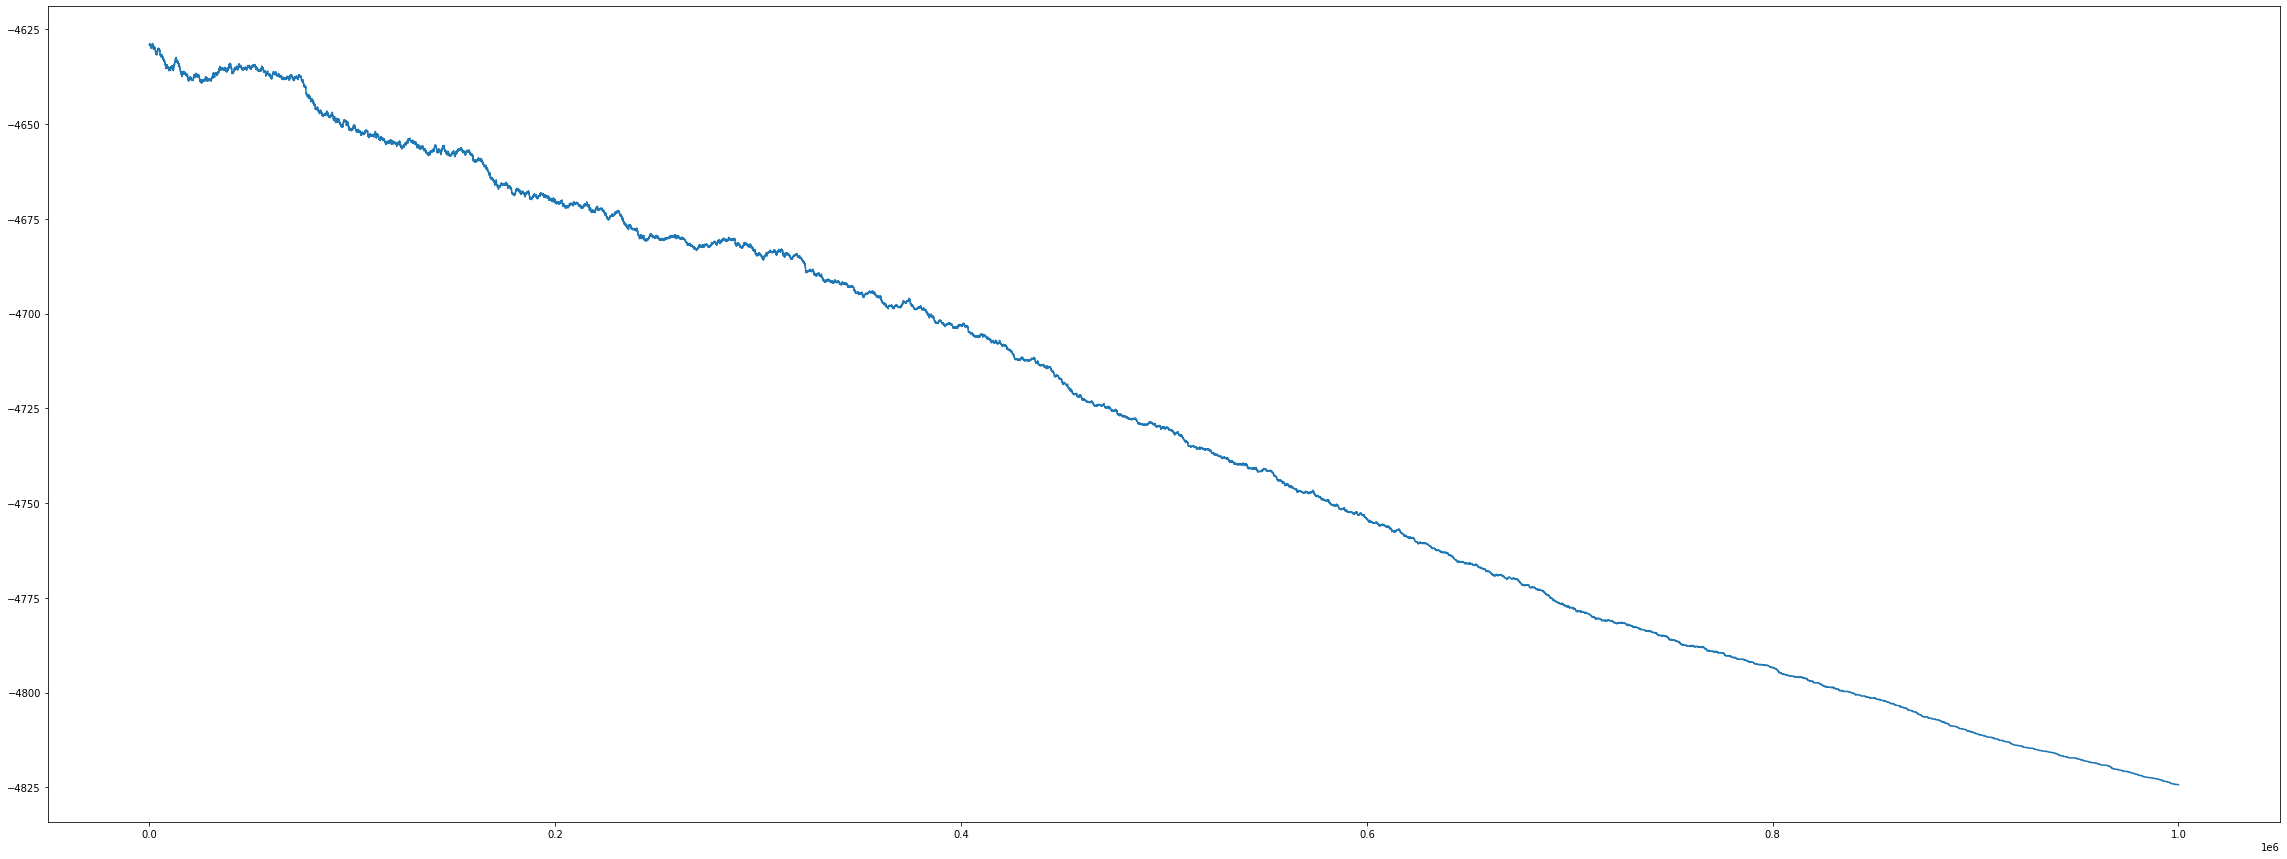

In [37]:
plt.plot(range(numberSteps+1), energylist)

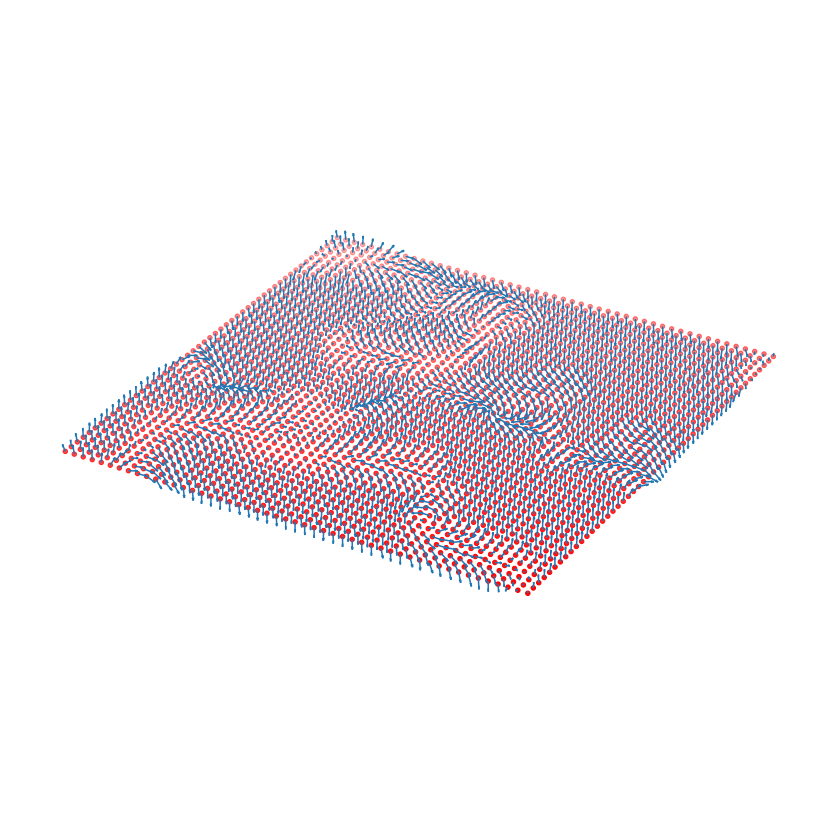

In [38]:
arrowplot = plt.axes(projection = '3d')
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length,length,2))

arrowplot.axis(False) # make background invisible

arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0], mag[1], mag[2]
)

arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')